# Read image

In [1]:
import numpy as np
import numpy.fft as fft
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from math import pi

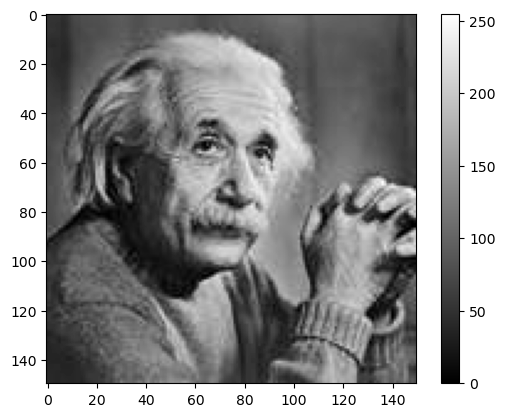

In [2]:
source = imread("einstein.bmp")
#plt.figure(num=None, figsize=(8,6), dpi=80)
plt.imshow(source, cmap='gray')
plt.colorbar()

# Oversampling (Padding)

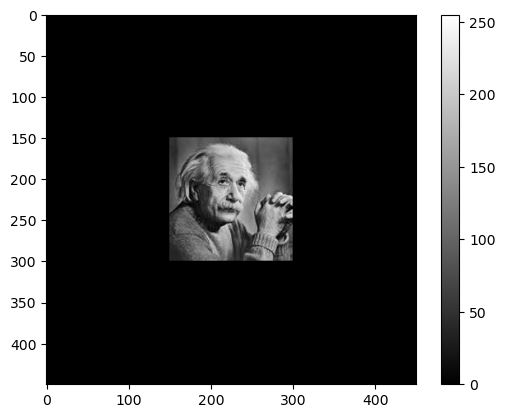

In [3]:
pad_len = len(source)
padded = np.pad(source, ((pad_len, pad_len),(pad_len, pad_len)), 'constant', 
                constant_values=((0,0),(0,0)))

plt.imshow(padded, cmap='gray')
plt.colorbar()


In [4]:
#ft = np.fft.ifftshift(padded)
ft = np.fft.fft2(padded)
#ft = np.fft.fftshift(ft)

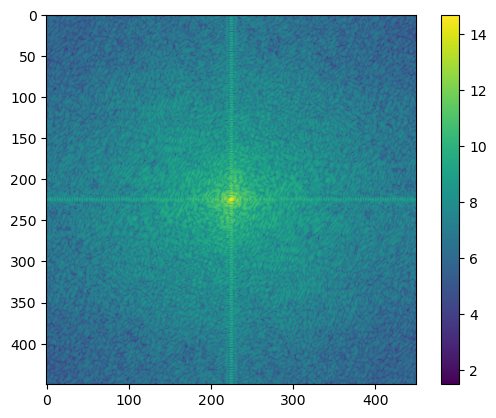

In [5]:
plt.imshow(np.log(np.abs(np.fft.fftshift(ft))))
plt.colorbar()

In [6]:
diffract = np.abs(ft)

lenpadded = len(padded)
print(lenpadded)
print(np.unravel_index(np.argmax(diffract),diffract.shape))

450
(0, 0)


# Keep Track of where the image and padding

In [7]:
mask = np.ones((pad_len+2,pad_len+2))
mask = np.pad(mask, ((pad_len-1, pad_len-1),(pad_len-1, pad_len-1)), 'constant', 
                constant_values=((0,0),(0,0)))

# Reconstruction

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800


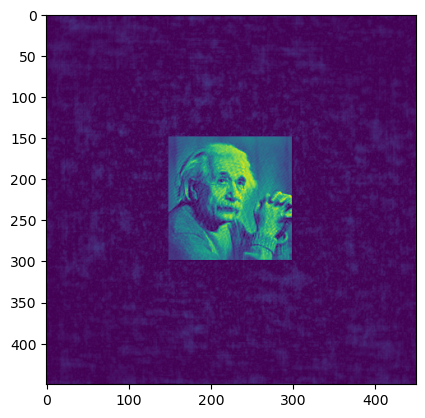

In [9]:
#Initial guess using random phase info
guess = diffract * np.exp(1j * np.random.rand(lenpadded,lenpadded) * 2 * pi)

#number of iterations
r = 801

#step size parameter
beta = 0.8

#previous result
prev = None
for s in range(0,r):
    #apply fourier domain constraints
    update = diffract * np.exp(1j * np.angle(guess)) 
    
    inv = fft.ifft2(update)
    inv = np.real(inv)
    if prev is None:
        prev = inv
        
    #apply real-space constraints
    temp = inv
    support_mask = (mask == 0)
    positive_mask = (inv < 0) & (mask == 1)
    inv[positive_mask] = prev[positive_mask] - beta * inv[positive_mask]
    inv[support_mask] = prev[support_mask] - beta * inv[support_mask]
            
    prev = temp
    
    guess = fft.fft2(inv)
        
    if s % 10 == 0:
        #plt.figure(num=None, figsize=(8,6), dpi=80)
        plt.imshow(abs(prev))
        print(s)

# Long Runtime Version (Do not run it unless you want to prove it)

In [ ]:
#Initial guess using random phase info
guess = diffract * np.exp(1j * np.random.rand(lenpadded,lenpadded) * 2 * pi)

#number of iterations
r = 1001

#step size parameter
beta = 0.8

#previous result
prev = None

for s in range(0,r):
    #apply fourier domain constraints
    update = diffract * np.exp(1j * np.angle(guess)) 
    
    inv = fft.ifft2(np.fft.ifftshift(update))
    inv = np.real(inv)
    if prev is None:
        prev = inv
        
    #apply real-space constraints
    temp = inv
    for i in range(0,lenpadded):
        for j in range(0,lenpadded):
            #image region must be positive
            if inv[i,j] < 0 and mask[i,j] == 1:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
            #push support region intensity toward zero
            if mask[i,j] == 0:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
    
    
    prev = temp
    guess =  np.fft.fftshift(fft.fft2(inv))
        
    if s % 10 == 0:
        #plt.figure(num=None, figsize=(8,6), dpi=80)
        plt.imshow(abs(prev))
        print(s)

# Shifting the Position of the Original Image

450
(225, 225)


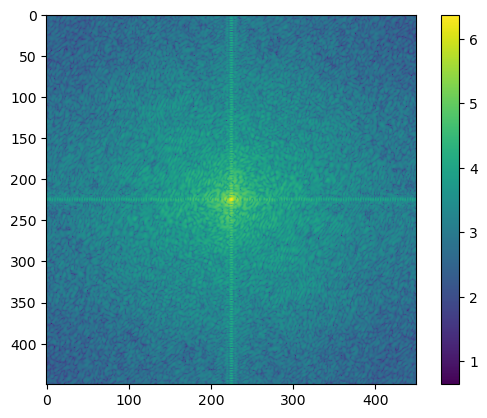

In [24]:
source = imread("einstein.bmp")

pad_len = len(source)
padded = np.pad(source, ((pad_len, pad_len),(pad_len, pad_len)), 'constant', 
                constant_values=((0,0),(0,0)))

ft = np.fft.ifftshift(padded)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

diffract2 = np.abs(ft)

lenpadded = len(padded)
print(lenpadded)
print(np.unravel_index(np.argmax(diffract2),diffract2.shape))
plt.imshow(np.log(diffract2))

plt.imshow(np.log10(diffract2))
plt.colorbar()

mask = np.ones((pad_len,pad_len))
mask = np.pad(mask, ((pad_len, pad_len+20),(pad_len, pad_len+20)), 'constant', constant_values=((0,0),(0,0)))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


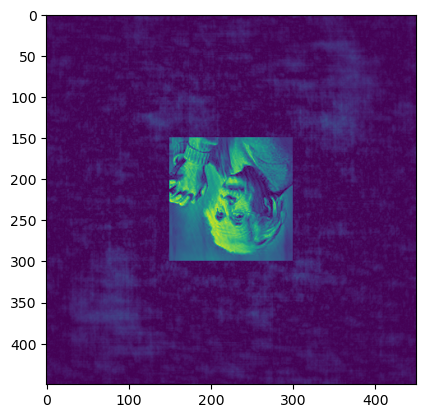

In [25]:
#Initial guess using random phase info
guess = diffract2 * np.exp(1j * np.random.rand(lenpadded,lenpadded) * 2 * pi)

#number of iterations
r = 1001

#step size parameter
beta = 0.8

#previous result
prev = None

for s in range(0,r):
    #apply fourier domain constraints
    update = diffract2 * np.exp(1j * np.angle(guess)) 
    
    inv = fft.ifft2(np.fft.ifftshift(update))
    inv = np.real(inv)
    if prev is None:
        prev = inv
        
    #apply real-space constraints
    temp = inv
    for i in range(0,lenpadded):
        for j in range(0,lenpadded):
            #image region must be positive
            if inv[i,j] < 0 and mask[i,j] == 1:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
            #push support region intensity toward zero
            if mask[i,j] == 0:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
    
    
    prev = temp
    guess =  np.fft.fftshift(fft.fft2(inv))
        
    if s % 10 == 0:
        #plt.figure(num=None, figsize=(8,6), dpi=80)
        plt.imshow(abs(prev))
        print(s)

In [22]:
sub = diffract2 - diffract
sub.max(),sub.min(),sub.sum()


(0.0, 0.0, 0.0)

# Reconstruction

In [ ]:
plt.imshow(np.log(abs(prev)), cmap='gray')